In this practice we will solve multiple systems of differential equations numerically.

To run any cell, please click on the "Play"/"Run" button on the top menu, or press the "Shift+Enter" combination on your keyboard.

When opening it for the first time, please run the first cell before doing anything else (it is the cell just below this text)

In [88]:
#Including all the necessary libraries
from num_sol_plot import *

First we will see some examples of systems should be familiar with, for example, a central force with

$$
V = \frac{k}{r}
$$

We define the force in the function 'force_fct', which in general can depend on x, y (generalized coordinates) and its derivatives, vx and vy.

Then we call the function "solve_eom", which returns the result of solving the system of equations numerically (xp and dxp are the x-position and its derivative; similarly, yp and dyp are defined). 

The function solve_eom needs the following parameters:

 - $t_0$ and $t_f$, the initial and final times
    
 - $x_0$, $y_0$ - position of the particle at $t_0$, that is, $x(t_0)$, $y(t_0)$
    
 - $vx_0$, $vy_0$ - velocity of the particle at $t_0$, that is, $\dot{x}(t0)$, $\dot{y}(t0)$
    
After that, we can plot the trajectory of the particle (xp(t) and yp(t)), the velocities, or plot the trajectory as (xp(t), yp(t)).

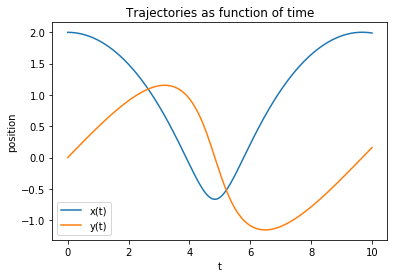

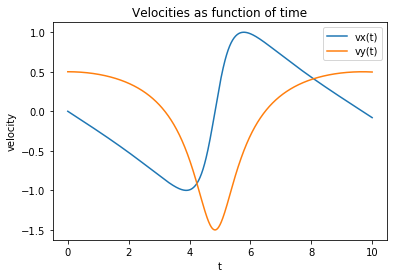

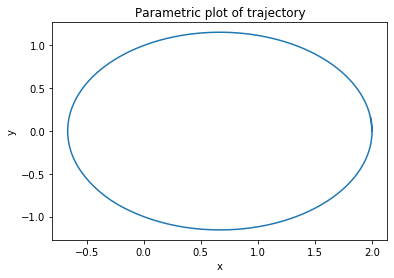

In [89]:
#In this example, we let the force be a central forcee, V = k/r, with k=1.
#We also define the energy, in case we want to see how it evolves with time (due to numerical errors)
%matplotlib inline
def force_fct(t, x, y, vx, vy):
    r = np.sqrt(x*x+y*y)
    r32 = np.power(r, 3.0)
    return [-x/r32, -y/r32, vx, vy]

xp, dxp, yp, dyp, t = solve_eom(0, 10, 2, 0, 0, 0.5, force_fct, n=1000)

plot_trajectory(xp, yp, t)
plot_velocities(dxp, dyp, t)
plot_xy_plane(xp, yp)

We can also animate it, and see the evolution of $xp(t)$ and $yp(t)$ as a function of time.

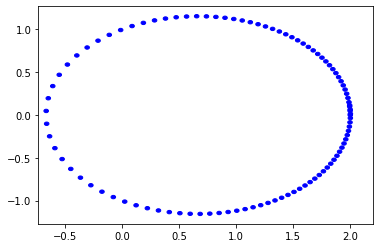

In [92]:
%matplotlib tk
animate(xp, yp, t, 0.02);

In this example, we have $V = a r$, with a=1, as in problem 6.2.

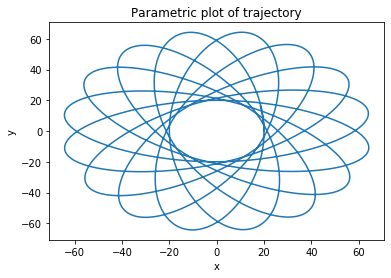

In [95]:
#In this example, we let the force be a central forcee, V = a*r, with k=1, as in problem 6.2
#We also define the energy, in case we want to see how it evolves with time (due to numerical errors)
%matplotlib inline
def force_fct(t, x, y, vx, vy):
    r = np.sqrt(x*x+y*y)
    return [-x/r, -y/r, vx, vy]

xp, dxp, yp, dyp, t = solve_eom(0, 390, 20, 0, 0, 10, force_fct)

#plot_trajectory(sol, t)
#plot_velocities(sol, t)
plot_xy_plane(xp, yp)
plt.show()

In this example, we let the force be a central forcee, $V = \frac{1}{2}k (x^2+y^2)$, with $k = 1$ - as in problem 6.3.

This gives a graphical proof for the bonus question: the parametric plot is always an ellipse!

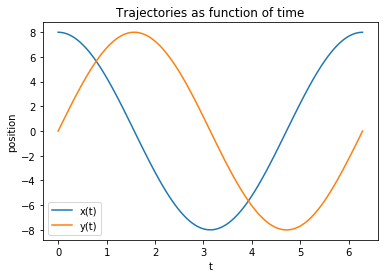

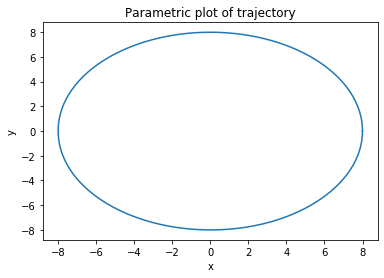

In [97]:
%matplotlib inline
def force_fct(t, x, y, vx, vy):
    return [-x, -y, vx, vy]

xp, dxp, yp, dyp, t = solve_eom(0, 2*np.pi, 8, 0, 0, 8, force_fct)

plot_trajectory(xp, yp, t)
plot_xy_plane(xp, yp)

In this example, we have a damped harmonic oscillator.

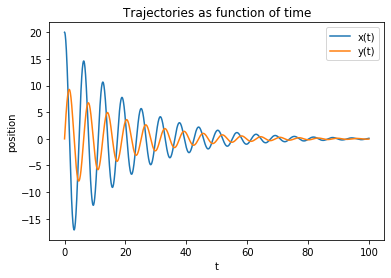

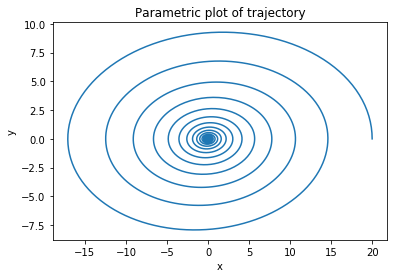

In [100]:
%matplotlib inline
def force_fct(t, x, y, vx, vy):
    r = np.sqrt(x*x+y*y)
    return [-x-0.1*vx, -y-0.1*vy, vx, vy]

xp, dxp, yp, dyp, t = solve_eom(0, 100, 20, 0, 0, 10, force_fct)

plot_trajectory(xp, yp, t)
plot_xy_plane(xp, yp)

In [99]:
%matplotlib tk
animate(xp, yp, t, r=0.1, f_skip=3);

But now, we have a $\textit{driven}$ damped harmonic oscillator. This produces some interesting trajectories.

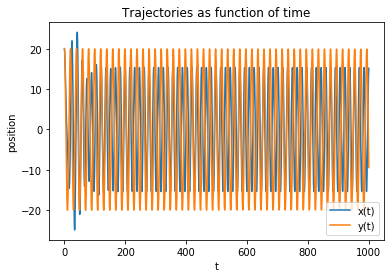

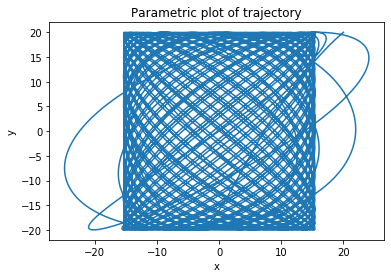

In [102]:
%matplotlib inline
def force_fct(t, x, y, vx, vy):
    r = np.sqrt(x*x+y*y)
    w0 = np.sqrt(0.1)
    eta = 0.1
    return [-w0**2*x-2.0*eta*w0*vx+np.sin(0.4*t), -0.1*y, vx, vy]

xp, dxp, yp, dyp, t = solve_eom(0, 1000, 20, 20, 0, 0, force_fct)

plot_trajectory(xp, yp, t)
plot_xy_plane(xp, yp)

Now something even more interesting, a double pendulum.

In order to plot things nicely and being able to visualize the problem, we need to transform the coordinates from $\theta_1$ and $\theta_2$ to $x_1, y_1$ and $x_2, y_2$.

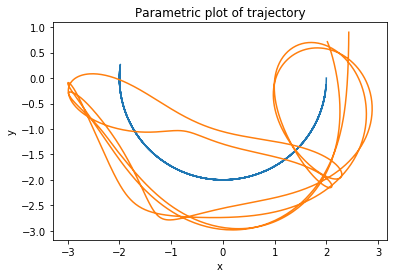

In [105]:
%matplotlib inline
m1, m2 = 2.0, 0.5
l1, l2 = 2.0, 1.0
g = 10.0

def force_fct(t, theta1, theta2, dtheta1, dtheta2):
    s1 = np.sin(theta1)
    s2 = np.sin(theta2)
    cd = np.cos(theta1-theta2)
    sd = np.sin(theta1-theta2)
    ddtheta1 = (m2*g*s2*cd-m2*l1*sd*cd*dtheta1**2-g*(m1+m2)*s1-m2*l2*dtheta2**2*sd)/(l1*(m1+m2*sd**2))
    ddtheta2 = (m2*l2*dtheta2**2*sd*cd+(m1+m2)*(s1*g*cd+l1*sd*dtheta1**2-g*s2))/(l2*(m1+m2*sd**2))
    return [ddtheta1, ddtheta2, dtheta1, dtheta2]

def coord_transform(t, theta1, theta2):
    x1 = l1*np.sin(theta1)
    y1 = -l1*np.cos(theta1)
    x2 = x1 + l2*np.sin(theta2)
    y2 = y1 - l2*np.cos(theta2)
    return [x1, y1, x2, y2]

theta1, dtheta1, theta2, dtheta2, t = solve_eom(0, 10, np.pi*0.5, 6*np.pi/7.0, 0, 0, force_fct, n=2000, max_stp=1.0)
xp1, yp1, xp2, yp2 = coord_transform(t, theta1, theta2)

plot_xy_plane(xp1, yp1, xp2, yp2)

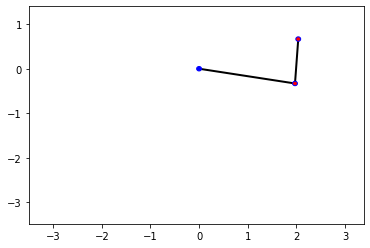

In [84]:
%matplotlib tk
anim_double_pendulum(xp1, yp1, xp2, yp2, t);

0.006758595230044278


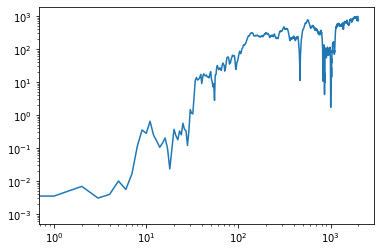

In [123]:
%matplotlib inline
m1, m2 = 2.0, 0.5
l1, l2 = 2.0, 1.0
g = 10.0

tf = 2000

theta1, dtheta1, theta2, dtheta2, t = solve_eom(0, tf, np.pi*0.5, 0.0, 0, 0, force_fct, n=tf)

theta1_2, dtheta1_2, theta2_2, dtheta2_2, t = solve_eom(0, tf, np.pi*0.5+0.001, 0.0, 0, 0, force_fct, n=tf)

dist_phase_space = np.sqrt((theta1-theta1_2)**2+(theta2-theta2_2)**2+(dtheta1-dtheta1_2)**2+(dtheta2-dtheta2_2)**2)

l_exp = 0.0
for i in range(len(dist_phase_space)):
    if i < (tf-1):
        l_exp = l_exp + np.log(dist_phase_space[i+1]/dist_phase_space[i])

print(l_exp/tf)

plt.yscale('log')
plt.xscale('log')
plt.plot(t, dist_phase_space)